# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we will be going through a machine learning project with the goal of predicting the sale price of bulldozers.

Since we're trying to predict a number, this kind of problem is known as a regression problem.

The data and evaluation metric we'll be using is **root mean square log error or RMSLE.**


# 1. Problem Definition

For this dataset, the problem we're trying to solve, or better, the question we're trying to answer is,

> How well can we predict the future sale price of a bulldozer, given its characteristics previous examples of how much similar bulldozers have been sold for?


# 2. Data

Looking at the dataset , we can see it's a time series problem. This means there's a time attribute to dataset.

In this case, it's historical sales data of bulldozers. Including things like, model type, size, sale date and more.

There are 3 datasets:

* 1. Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
* 2. Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
* 3. Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).


# 3. Evaluation

For this problem, the evaluation metric is set to be the **root mean squared log error (RMSLE)**. As with many regression evaluations, the goal will be to get this value as low as possible.


# 4. Features

Features are different parts of the data. During this step, we'll want to start finding out what we can about the data.

One of the most common ways to do this, is to create a data dictionary.

For this dataset, we have a data dictionary which contains information about what each attribute of the dataset means. 

With all of this being known, let's get started!

First, we'll import the dataset and start exploring. Since we know the evaluation metric we're trying to minimise, our first goal will be building a baseline model. 

## Import the data

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set()

In [49]:
# Setting some default stylings for our visualizations

rcParams['font.family'] = 'comic sans ms'
rcParams['figure.figsize'] = (12, 8)
rcParams['lines.linewidth'] = 2.5
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

In [50]:
# we will be importing the trainin gand validation sets
data = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False)
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

We can see that some columns have a fair number of missing values. Let's explore on it.

In [52]:
data.isnull().mean()

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
saledate                    0.000000
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
T

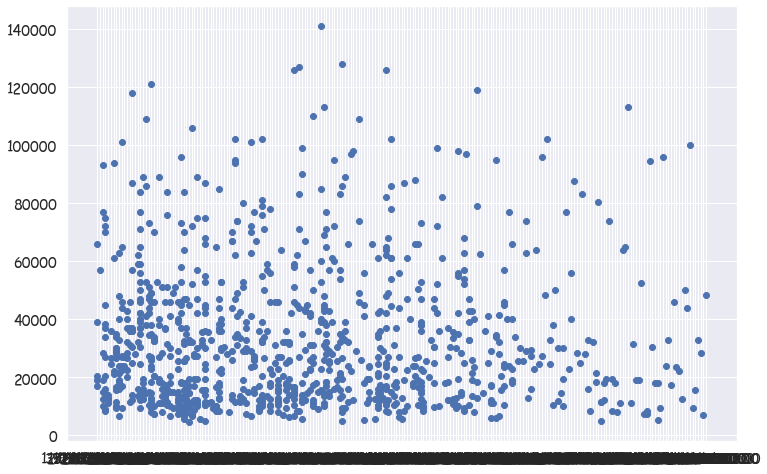

In [53]:
plt.scatter(data['saledate'][:1000], data['SalePrice'][:1000]);

Let's see how our dependent variable is distributed

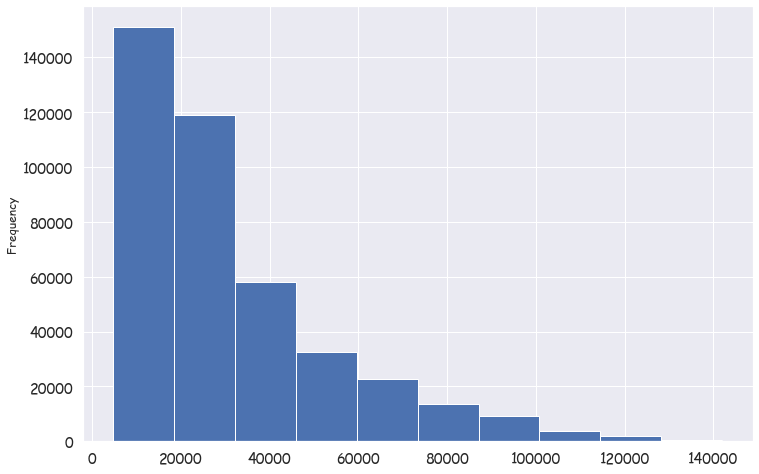

In [54]:
data['SalePrice'].plot(kind='hist');

In [55]:
data['saledate'][:100]

0     11/16/2006 0:00
1      3/26/2004 0:00
2      2/26/2004 0:00
3      5/19/2011 0:00
4      7/23/2009 0:00
           ...       
95    12/15/2005 0:00
96     1/29/2004 0:00
97     9/18/2008 0:00
98     11/3/2005 0:00
99      6/1/2006 0:00
Name: saledate, Length: 100, dtype: object

As the dates are in mm/dd/yyyy format, the x-axis looks like a barcode. Let's plot a histogram of our dependent variable, Saleprice.

## Parsing dates

When working with time series data, it's a good idea to make sure any date data is the format of a datetime object (a Python data type which encodes specific information about dates).

In [56]:
data = pd.read_csv('bluebook-for-bulldozers/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
data['saledate'][:100]

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
        ...    
95   2005-12-15
96   2004-01-29
97   2008-09-18
98   2005-11-03
99   2006-06-01
Name: saledate, Length: 100, dtype: datetime64[ns]

As we can see, we have succesfully converted our saledate column into a datetime type!!! This will be very helpful in our analysis.

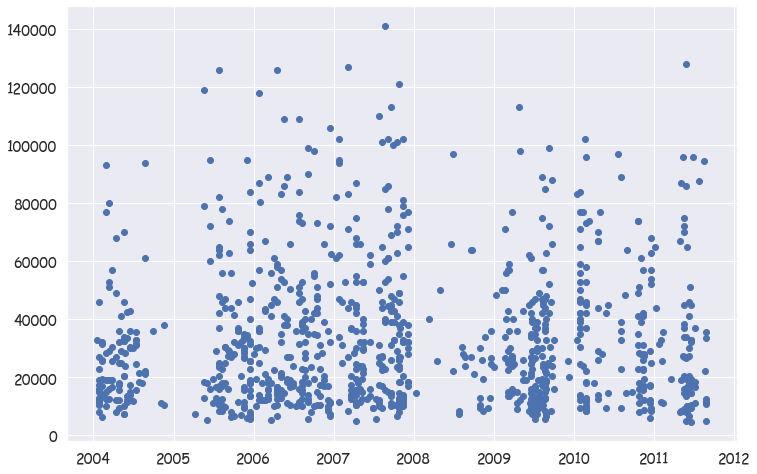

In [58]:
plt.scatter(data['saledate'][:1000], data['SalePrice'][:1000]);

In [59]:
pd.set_option('display.max_columns', 60)

In [60]:
data['saledate'].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [61]:
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


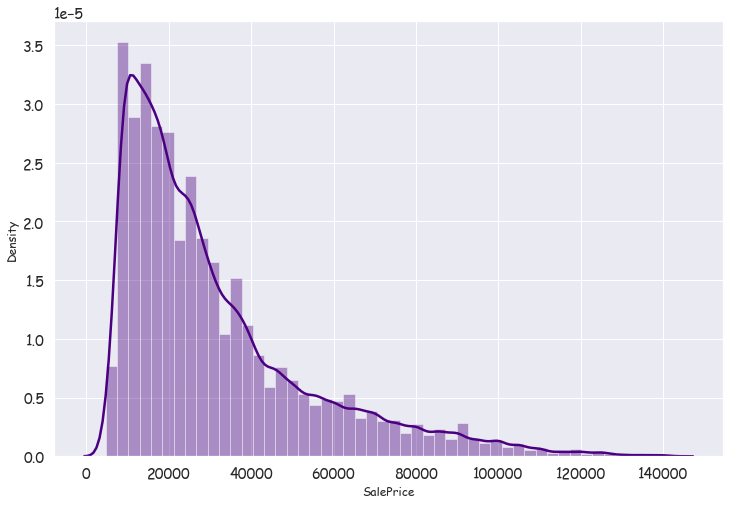

In [62]:
sns.distplot(data['SalePrice'], color='indigo');

As we can see from the above plot, the Saleprice is heavily skewed(positively skewed) to the right. This means that there are a lot of bulldozers which costs a lot. Most of the bulldozers sale featured in this dataset has a price limit of 60000 dollars.

We need to apply some kind of transformation to remove this skewness.

Let's try log transformation.

In [63]:
data['logSalePrice'] = np.log(data['SalePrice'])
data.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,logSalePrice
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,11.097410
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,10.950807
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.210340
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.558414
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.305651


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


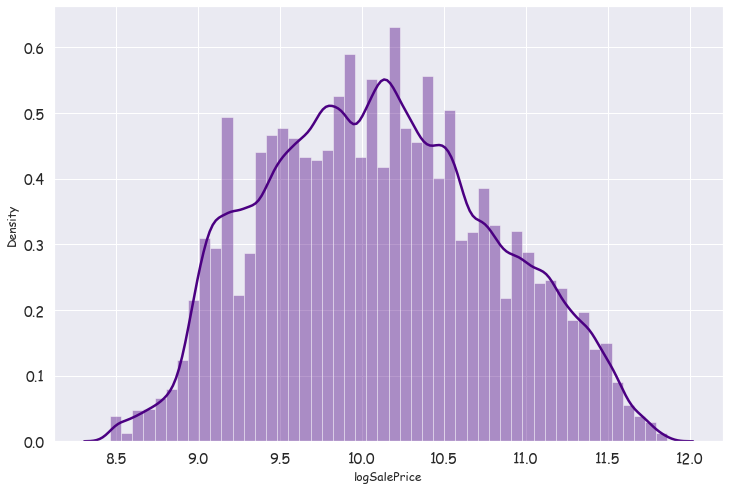

In [64]:
sns.distplot(data['logSalePrice'], color='indigo');

Much better. We will be using the log transformed value of Saleprice and drop the original column.

In [65]:
data.drop('SalePrice', axis=1, inplace=True)
data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,logSalePrice
0,1139246,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,11.097410
1,1139248,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,10.950807
2,1139249,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.210340
3,1139251,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.558414
4,1139253,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.305651


## Sort DataFrame by saledate

As we're working on a time series problem and trying to predict future examples given past examples, it makes sense to sort our data by date.

In [66]:
data.sort_values(by=['saledate'], inplace=True, ascending=True)
data['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Make a copy of the original DataFrame

Since we're going to be manipulating the data, we'll make a copy of the original DataFrame and perform our changes there.

This will keep the original DataFrame in tact if we need it again.

In [67]:
data_temp = data.copy()

In [68]:
data_temp['saledate'].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

## Add datetime parameters for saledate column

Why are we doing this?

So we can enrich our dataset with as much information as possible.

Because we imported the data using read_csv() and asked pandas to parse the dates using parase_dates=["saledate"], we can now access the different datetime attributes of the saledate column.

In [69]:
data_temp.saledate.dt.day

205615    17
274835    31
141296    31
212552    31
62755     31
          ..
410879    28
412476    28
411927    28
407124    28
409203    28
Name: saledate, Length: 412698, dtype: int64

In [70]:
# adding datetime parametrs for saleDate

data_temp['saleYear'] = data_temp.saledate.dt.year
data_temp['saleMonth'] = data_temp.saledate.dt.month
data_temp['saleDay'] = data_temp.saledate.dt.day
data_temp['saleDayofWeek'] = data_temp.saledate.dt.dayofweek
data_temp['saleDayofYear'] = data_temp.saledate.dt.dayofyear

# dropping the original saledate column from our dataset
data_temp.drop('saledate', axis=1, inplace=True)

In [71]:
data_temp.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,logSalePrice,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
205615,1646770,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,9.159047,1989,1,17,1,17
274835,1821514,1194089,10150,132,99.0,1980,NaN,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,9.546813,1989,1,31,1,31
141296,1505138,1473654,4139,132,99.0,1978,NaN,NaN,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,10.819778,1989,1,31,1,31
212552,1671174,1327630,8591,132,99.0,1980,NaN,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,9.680344,1989,1,31,1,31
62755,1329056,1336053,4089,132,99.0,1984,NaN,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,9.998798,1989,1,31,1,31


In [72]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   MachineID                 412698 non-null  int64  
 2   ModelID                   412698 non-null  int64  
 3   datasource                412698 non-null  int64  
 4   auctioneerID              392562 non-null  float64
 5   YearMade                  412698 non-null  int64  
 6   MachineHoursCurrentMeter  147504 non-null  float64
 7   UsageBand                 73670 non-null   object 
 8   fiModelDesc               412698 non-null  object 
 9   fiBaseModel               412698 non-null  object 
 10  fiSecondaryDesc           271971 non-null  object 
 11  fiModelSeries             58667 non-null   object 
 12  fiModelDescriptor         74816 non-null   object 
 13  ProductSize               196093 non-nu

## Selecting the independent and dependent features

In [73]:
x = data_temp.drop(['logSalePrice','datasource'], axis=1)
x.head()

,SalesID,MachineID,ModelID,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
205615,1646770,1126363,8434,18.0,1974,NaN,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
274835,1821514,1194089,10150,99.0,1980,NaN,NaN,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
141296,1505138,1473654,4139,99.0,1978,NaN,NaN,D7G,D7,G,NaN,NaN,Large,"Track Type Tractor, Dozer - 190.0 to 260.0 Hor...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
212552,1671174,1327630,8591,99.0,1980,NaN,NaN,A62,A62,NaN,NaN,NaN,NaN,Wheel Loader - Unidentified,Florida,WL,Wheel Loader,NaN,EROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
62755,1329056,1336053,4089,99.0,1984,NaN,NaN,D3B,D3,B,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


In [74]:
y = data_temp['logSalePrice']
y

205615     9.159047
274835     9.546813
141296    10.819778
212552     9.680344
62755      9.998798
            ...    
410879     9.680344
412476     8.699515
411927     9.680344
407124    10.915088
409203    10.434116
Name: logSalePrice, Length: 412698, dtype: float64

In [84]:
y.median(), np.exp(y.median())

(10.085809109330082, 23999.999999999985)

## Selecting the Numerical and Categorical features

In [81]:
num = x.select_dtypes(include='number')
print(list(num.columns))

['SalesID', 'MachineID', 'ModelID', 'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'saleYear', 'saleMonth', 'saleDay', 'saleDayofWeek', 'saleDayofYear']


In [82]:
char = x.select_dtypes(include='object')
print(list(char.columns))

['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls', 'Differential_Type', 'Steering_Controls']


In [83]:
print ("The shape of numerical dataframe :",num.shape)
print ("The shape of categorical datafrme :",char.shape)

The shape of numerical dataframe : (412698, 11)
The shape of categorical datafrme : (412698, 44)


## Missing Value Imputation - Numerical Features

In [88]:
# here, we are basically filling the missing values of each feature with its median value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
num_no_mv = pd.DataFrame(imputer.fit_transform(num), index=num.index, columns=num.columns)
num_no_mv

,SalesID,MachineID,ModelID,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear
205615,1646770.0,1126363.0,8434.0,18.0,1974.0,0.0,1989.0,1.0,17.0,1.0,17.0
274835,1821514.0,1194089.0,10150.0,99.0,1980.0,0.0,1989.0,1.0,31.0,1.0,31.0
141296,1505138.0,1473654.0,4139.0,99.0,1978.0,0.0,1989.0,1.0,31.0,1.0,31.0
212552,1671174.0,1327630.0,8591.0,99.0,1980.0,0.0,1989.0,1.0,31.0,1.0,31.0
62755,1329056.0,1336053.0,4089.0,99.0,1984.0,0.0,1989.0,1.0,31.0,1.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...
410879,6302984.0,1915521.0,5266.0,99.0,2001.0,0.0,2012.0,4.0,28.0,5.0,119.0
412476,6324811.0,1919104.0,19330.0,99.0,2004.0,0.0,2012.0,4.0,28.0,5.0,119.0
411927,6313029.0,1918416.0,17244.0,99.0,2004.0,0.0,2012.0,4.0,28.0,5.0,119.0
407124,6266251.0,509560.0,3357.0,99.0,1993.0,0.0,2012.0,4.0,28.0,5.0,119.0


In [90]:
# check if there's any missing values left in any feature
num_no_mv.isnull().mean()

SalesID                     0.0
MachineID                   0.0
ModelID                     0.0
auctioneerID                0.0
YearMade                    0.0
MachineHoursCurrentMeter    0.0
saleYear                    0.0
saleMonth                   0.0
saleDay                     0.0
saleDayofWeek               0.0
saleDayofYear               0.0
dtype: float64

We don't have any more missing values left in our numerical dataframe!!!!

## Missing Value Imputation - Categorical Features

Now that we've filled the numeric values, we'll do the same with the categorical values at the same time as turning them into numbers.

In [91]:
char.isnull().mean()

UsageBand                  0.821492
fiModelDesc                0.000000
fiBaseModel                0.000000
fiSecondaryDesc            0.340993
fiModelSeries              0.857845
fiModelDescriptor          0.818715
ProductSize                0.524851
fiProductClassDesc         0.000000
state                      0.000000
ProductGroup               0.000000
ProductGroupDesc           0.000000
Drive_System               0.740520
Enclosure                  0.000809
Forks                      0.520921
Pad_Type                   0.803498
Ride_Control               0.629928
Stick                      0.803498
Transmission               0.544444
Turbocharged               0.803498
Blade_Extension            0.937041
Blade_Width                0.937041
Enclosure_Type             0.937041
Engine_Horsepower          0.937041
Hydraulics                 0.200062
Pushblock                  0.937041
Ripper                     0.740864
Scarifier                  0.937014
Tip_Control                0

We have so many columns with missing values greater 25%, so we cannot drop all these columns. Instead we will convert them into categories.<br>
The missing values will have a category '0' so that it can be easily distinguished.

In [92]:
# Turn categorical variables into numbers
for label, content in char.items():
    # We add the +1 because pandas encodes missing categories as -1
    char[label] = pd.Categorical(content).codes+1


<ipython-input-92-5efcca69f675>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char[label] = pd.Categorical(content).codes+1


In [95]:
char.head()

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0
274835,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2
141296,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0
212552,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2
62755,0,2119,683,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0


In [94]:
char.isnull().mean()

UsageBand                  0.0
fiModelDesc                0.0
fiBaseModel                0.0
fiSecondaryDesc            0.0
fiModelSeries              0.0
fiModelDescriptor          0.0
ProductSize                0.0
fiProductClassDesc         0.0
state                      0.0
ProductGroup               0.0
ProductGroupDesc           0.0
Drive_System               0.0
Enclosure                  0.0
Forks                      0.0
Pad_Type                   0.0
Ride_Control               0.0
Stick                      0.0
Transmission               0.0
Turbocharged               0.0
Blade_Extension            0.0
Blade_Width                0.0
Enclosure_Type             0.0
Engine_Horsepower          0.0
Hydraulics                 0.0
Pushblock                  0.0
Ripper                     0.0
Scarifier                  0.0
Tip_Control                0.0
Tire_Size                  0.0
Coupler                    0.0
Coupler_System             0.0
Grouser_Tracks             0.0
Hydrauli

We have converted all our categorical features into categories as well as removed all the missing values!!!!

## Building the complete feature set

Now, we are going to combine our imputed numerical dataset and our encoded categorical dataset to form a single dataset, which is going to be our final master dataset.

We will use this dataset to feed our model. The concat method from pandas is used to combine the two datasets.

In [96]:
x_all = pd.concat([num_no_mv, char], axis=1, join='inner')
x_all.head()

,SalesID,MachineID,ModelID,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayofWeek,saleDayofYear,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770.0,1126363.0,8434.0,18.0,1974.0,0.0,1989.0,1.0,17.0,1.0,17.0,0,4593,1744,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0
274835,1821514.0,1194089.0,10150.0,99.0,1980.0,0.0,1989.0,1.0,31.0,1.0,31.0,0,1820,559,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2
141296,1505138.0,1473654.0,4139.0,99.0,1978.0,0.0,1989.0,1.0,31.0,1.0,31.0,0,2348,713,59,0,0,2,50,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0
212552,1671174.0,1327630.0,8591.0,99.0,1980.0,0.0,1989.0,1.0,31.0,1.0,31.0,0,1819,558,0,0,0,0,74,9,6,6,0,1,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2
62755,1329056.0,1336053.0,4089.0,99.0,1984.0,0.0,1989.0,1.0,31.0,1.0,31.0,0,2119,683,21,0,0,0,51,9,5,5,0,6,0,0,0,0,8,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,5,0,0


In [97]:
x_all.shape

(412698, 55)

## Selecting features to feed our model

As we have a lot of features(55), we need to find out which features are the best and only feed that to our model. We will use random forest regressor to find out the feature importances of every feature.<br>
We will then take the best features and feed it to our model.

In [99]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1)
rf.fit(x_all, y)

RandomForestRegressor(n_jobs=-1)

In [100]:
# we are getting the feature importances of all the columns in our dataset and 
# displaying it in desceneding order so that we can choose our required number of features

feature_importances = pd.DataFrame(rf.feature_importances_, 
                                   index=x_all.columns, 
                                   columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances

,Importance
Coupler_System,0.202968
YearMade,0.171825
ProductSize,0.107493
fiProductClassDesc,0.106982
ModelID,0.090160
saleYear,0.067460
Enclosure,0.034819
fiModelDesc,0.031406
SalesID,0.028363
fiSecondaryDesc,0.026811


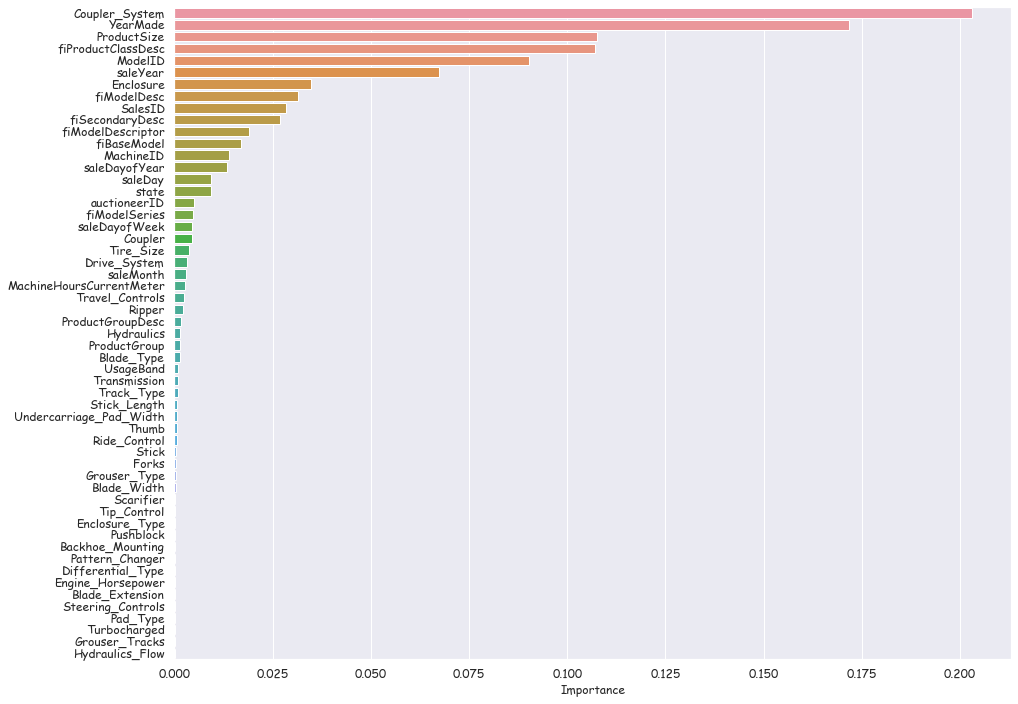

In [178]:
plt.figure(figsize=(15,12))
sns.barplot(x='Importance', y=feature_importances.index, data=feature_importances)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [101]:
# we are choosing the top 40 features

features_list = feature_importances.iloc[:40]
features_list

,Importance
Coupler_System,0.202968
YearMade,0.171825
ProductSize,0.107493
fiProductClassDesc,0.106982
ModelID,0.090160
saleYear,0.067460
Enclosure,0.034819
fiModelDesc,0.031406
SalesID,0.028363
fiSecondaryDesc,0.026811


In [102]:
top_features = list(features_list.index)
top_features

['Coupler_System',
 'YearMade',
 'ProductSize',
 'fiProductClassDesc',
 'ModelID',
 'saleYear',
 'Enclosure',
 'fiModelDesc',
 'SalesID',
 'fiSecondaryDesc',
 'fiModelDescriptor',
 'fiBaseModel',
 'MachineID',
 'saleDayofYear',
 'saleDay',
 'state',
 'auctioneerID',
 'fiModelSeries',
 'saleDayofWeek',
 'Coupler',
 'Tire_Size',
 'Drive_System',
 'saleMonth',
 'MachineHoursCurrentMeter',
 'Travel_Controls',
 'Ripper',
 'ProductGroupDesc',
 'Hydraulics',
 'ProductGroup',
 'Blade_Type',
 'UsageBand',
 'Transmission',
 'Track_Type',
 'Stick_Length',
 'Undercarriage_Pad_Width',
 'Thumb',
 'Ride_Control',
 'Stick',
 'Forks',
 'Grouser_Type']

In [103]:
x_all = x_all[top_features]
x_all.head()

,Coupler_System,YearMade,ProductSize,fiProductClassDesc,ModelID,saleYear,Enclosure,fiModelDesc,SalesID,fiSecondaryDesc,fiModelDescriptor,fiBaseModel,MachineID,saleDayofYear,saleDay,state,auctioneerID,fiModelSeries,saleDayofWeek,Coupler,Tire_Size,Drive_System,saleMonth,MachineHoursCurrentMeter,Travel_Controls,Ripper,ProductGroupDesc,Hydraulics,ProductGroup,Blade_Type,UsageBand,Transmission,Track_Type,Stick_Length,Undercarriage_Pad_Width,Thumb,Ride_Control,Stick,Forks,Grouser_Type
205615,0,1974.0,4,47,8434.0,1989.0,6,4593,1646770.0,0,0,1744,1126363.0,17.0,17.0,44,18.0,0,1.0,0,0,0,1.0,0.0,6,2,5,1,5,8,0,3,0,0,0,0,0,0,0,0
274835,0,1980.0,0,60,10150.0,1989.0,6,1820,1821514.0,0,0,559,1194089.0,31.0,31.0,9,99.0,0,1.0,3,17,0,1.0,0.0,0,0,6,1,6,0,0,0,0,0,0,0,2,0,1,0
141296,0,1978.0,2,50,4139.0,1989.0,6,2348,1505138.0,59,0,713,1473654.0,31.0,31.0,9,99.0,0,1.0,0,0,0,1.0,0.0,6,2,5,1,5,8,0,8,0,0,0,0,0,0,0,0
212552,0,1980.0,0,74,8591.0,1989.0,1,1819,1671174.0,0,0,558,1327630.0,31.0,31.0,9,99.0,0,1.0,3,17,0,1.0,0.0,0,0,6,1,6,0,0,0,0,0,0,0,2,0,1,0
62755,0,1984.0,0,51,4089.0,1989.0,6,2119,1329056.0,21,0,683,1336053.0,31.0,31.0,9,99.0,0,1.0,0,0,0,1.0,0.0,5,2,5,1,5,6,0,8,0,0,0,0,0,0,0,0


In [104]:
x_all.shape

(412698, 40)

## Splitting data into train/valid sets

The validation set and test set are split according to dates.

This makes sense since we're working on a time series problem.

E.g. using past events to try and predict future events.

Knowing this, randomly splitting our data into train and test sets using something like train_test_split() wouldn't work.

Instead, we split our data into training, validation and test sets using the date each sample occured.

In our case:

* Training = all samples up until 2011
* Valid = all samples form January 1, 2012 - April 30, 2012
* Test = all samples from May 1, 2012 - November 2012

In [105]:
np.exp(y)

205615     9500.0
274835    14000.0
141296    50000.0
212552    16000.0
62755     22000.0
           ...   
410879    16000.0
412476     6000.0
411927    16000.0
407124    55000.0
409203    34000.0
Name: logSalePrice, Length: 412698, dtype: float64

In [106]:
data_set = pd.concat([x_all, np.exp(y)], axis=1, join='inner')
data_set.rename(columns={'logSalePrice':'SalePrice'}, inplace=True)
data_set

,Coupler_System,YearMade,ProductSize,fiProductClassDesc,ModelID,saleYear,Enclosure,fiModelDesc,SalesID,fiSecondaryDesc,fiModelDescriptor,fiBaseModel,MachineID,saleDayofYear,saleDay,state,auctioneerID,fiModelSeries,saleDayofWeek,Coupler,Tire_Size,Drive_System,saleMonth,MachineHoursCurrentMeter,Travel_Controls,Ripper,ProductGroupDesc,Hydraulics,ProductGroup,Blade_Type,UsageBand,Transmission,Track_Type,Stick_Length,Undercarriage_Pad_Width,Thumb,Ride_Control,Stick,Forks,Grouser_Type,SalePrice
205615,0,1974.0,4,47,8434.0,1989.0,6,4593,1646770.0,0,0,1744,1126363.0,17.0,17.0,44,18.0,0,1.0,0,0,0,1.0,0.0,6,2,5,1,5,8,0,3,0,0,0,0,0,0,0,0,9500.0
274835,0,1980.0,0,60,10150.0,1989.0,6,1820,1821514.0,0,0,559,1194089.0,31.0,31.0,9,99.0,0,1.0,3,17,0,1.0,0.0,0,0,6,1,6,0,0,0,0,0,0,0,2,0,1,0,14000.0
141296,0,1978.0,2,50,4139.0,1989.0,6,2348,1505138.0,59,0,713,1473654.0,31.0,31.0,9,99.0,0,1.0,0,0,0,1.0,0.0,6,2,5,1,5,8,0,8,0,0,0,0,0,0,0,0,50000.0
212552,0,1980.0,0,74,8591.0,1989.0,1,1819,1671174.0,0,0,558,1327630.0,31.0,31.0,9,99.0,0,1.0,3,17,0,1.0,0.0,0,0,6,1,6,0,0,0,0,0,0,0,2,0,1,0,16000.0
62755,0,1984.0,0,51,4089.0,1989.0,6,2119,1329056.0,21,0,683,1336053.0,31.0,31.0,9,99.0,0,1.0,0,0,0,1.0,0.0,5,2,5,1,5,6,0,8,0,0,0,0,0,0,0,0,22000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410879,0,2001.0,0,53,5266.0,2012.0,6,2101,6302984.0,50,0,690,1915521.0,119.0,28.0,5,99.0,0,5.0,0,0,0,4.0,0.0,6,1,5,1,5,6,0,8,0,0,0,0,0,0,0,0,16000.0
412476,1,2004.0,0,41,19330.0,2012.0,6,240,6324811.0,0,0,84,1919104.0,119.0,28.0,5,99.0,0,5.0,3,0,0,4.0,0.0,0,0,3,4,3,0,0,0,0,0,0,0,0,0,1,0,6000.0
411927,0,2004.0,5,23,17244.0,2012.0,3,627,6313029.0,59,0,203,1918416.0,119.0,28.0,5,99.0,0,5.0,3,0,0,4.0,0.0,0,0,4,4,4,0,0,0,0,0,0,0,0,0,0,0,16000.0
407124,0,1993.0,0,31,3357.0,2012.0,6,83,6266251.0,59,0,19,509560.0,119.0,28.0,5,99.0,0,5.0,0,17,3,4.0,0.0,0,4,2,5,2,0,0,5,0,0,0,0,0,0,0,0,55000.0


In [107]:
# Splitting data into train and validation set

data_validation = data_set[data_set.saleYear == 2012]
data_training = data_set[data_set.saleYear != 2012]

In [108]:
data_validation.shape, data_training.shape

((11573, 41), (401125, 41))

In [109]:
# Split data into x & y

x_train, y_train = data_training.drop('SalePrice', axis=1), data_training['SalePrice']
x_valid, y_valid = data_validation.drop('SalePrice', axis=1), data_validation.SalePrice

## Testing different models

We will use two models: Decision Tree and Random Forest and see how each of them performs

In [110]:
from sklearn.tree import DecisionTreeRegressor
clf_dt = DecisionTreeRegressor()


In [112]:
clf_dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [113]:
%%time
clf_rf = RandomForestRegressor()
clf_rf.fit(x_train, y_train)

Wall time: 11min 7s


RandomForestRegressor()

In [114]:
clf_rf.score(x_train, y_train)

0.9874675923502142

## Building an evaluation function

The evaluation function we will use is root mean squared log error (RMSLE).
 
Since Scikit-Learn doesn't have a function built-in for RMSLE, we'll create our own.

We can do this by taking the square root of Scikit-Learn's mean_squared_log_error (MSLE). MSLE is the same as taking the log of mean squared error (MSE).

We'll also calculate the MAE and R^2 for fun.

In [115]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error

def rmsle(y_train, y_pred):
    return np.sqrt(mean_squared_log_error(y_train, y_pred))

# let's create a function to evaluate our model

def model_evaluate(model):
    train_preds = model.predict(x_train)
    valid_preds = model.predict(x_valid)
    
    scores = {
                "Training MAE": mean_absolute_error(y_train, train_preds),
                "Validation MAE": mean_absolute_error(y_valid, valid_preds),
                "Training RMSLE": rmsle(y_train, train_preds),
                "Validation RMSLE": rmsle(y_valid, valid_preds),
                "Training R-Squared": model.score(x_train, y_train),
                "Validation R-Squared": model.score(x_valid, y_valid),
                "Training RMSE": np.sqrt(mean_squared_error(y_train, train_preds)),
                "Validation RMSE": np.sqrt(mean_squared_error(y_valid, valid_preds))
        
                }
    
    return scores

In [ ]:
clf_rf.predict(x_train)

In [116]:
scores_dt = model_evaluate(clf_dt)
for key, value in scores_dt.items():
    print(key, ': ', value)

Training MAE :  3.899632128586499e-14
Validation MAE :  8395.858740171087
Training RMSLE :  6.702061389048059e-17
Validation RMSLE :  0.3491200744390164
Training R-Squared :  1.0
Validation R-Squared :  0.7537904732577884
Training RMSE :  5.169929130406059e-13
Validation RMSE :  13004.404329885132


In [117]:
scores_rf = model_evaluate(clf_rf)
for key, value in scores_rf.items():
    print(key, ': ', value)

Training MAE :  1581.9643231910252
Validation MAE :  6139.2931538926805
Training RMSLE :  0.0845721868430081
Validation RMSLE :  0.2563813778662429
Training R-Squared :  0.9874675923502142
Validation R-Squared :  0.8720969084434852
Training RMSE :  2578.9369465532095
Validation RMSE :  9372.998733131577


## Testing our model on a subset (to tune the hyperparameters)

Retraining an entire model would take far too long to continuing experimenting as fast as we want to.

So what we'll do is take a sample of the training set and tune the hyperparameters on that before training a larger model.

If our experiments are taking longer than 10-seconds (give or take how long we have to wait), we should be trying to speed things up. We can speed things up by sampling less data or using a faster computer.

Let's alter the number of samples each n_estimator in the RandomForestRegressor using the max_samples parameter.

In [118]:
model = RandomForestRegressor(n_jobs= -1, max_samples= 10000)


Setting max_samples to 10000 means every n_estimator (default 100) in our RandomForestRegressor will only see 10000 random samples from our DataFrame instead of the entire 400,000.

In other words, we'll be looking at 40x less samples which means we'll get faster computation speeds but we should expect our results to worsen (simple the model has less samples to learn patterns from).

Running the RandomForestRegrerssor on the whole dataset took more than 2 minutes, now it's taking 11 seconds.

In [119]:
%%time
model.fit(x_train, y_train)

Wall time: 10.2 s


RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [120]:
model_evaluate(model)

{'Training MAE': 5552.584073543158,
 'Validation MAE': 7146.924990927158,
 'Training RMSLE': 0.2577161783349319,
 'Validation RMSLE': 0.29567336430430474,
 'Training R-Squared': 0.8608118647496692,
 'Validation R-Squared': 0.8338452368572054,
 'Training RMSE': 8594.578363984401,
 'Validation RMSE': 10683.029685067493}

Beautiful, that took far less time than the model with all the data.

With this, let's try tune some hyperparameters.

## Hyperparameter tuning with RandomizedSearchCV

We can increase n_iter to try more combinations of hyperparameters but in our case, we'll try 20 and see where it gets us.

Remember, we're trying to reduce the amount of time it takes between experiments.

In [121]:
# setting different random forest classifier hyperparameters

rf_grid = {"n_estimators" : np.arange(10,100,10),    
            "max_depth" : [None, 3, 5, 7, 8, 10],
            "min_samples_split" : np.arange(2,20,2),
            "min_samples_leaf" : (1, 20, 2),
            "max_features" : [0.5, 1, 'sqrt','auto'],
            "max_samples" : [10000]

}

In [122]:
from sklearn.model_selection import RandomizedSearchCV

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                             param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

rs_model.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7, 8, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': (1, 20, 2),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [123]:
# finding the best parameters
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 12,
 'min_samples_leaf': 20,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': 10}

In [124]:
model_evaluate(rs_model)

{'Training MAE': 7327.587558027146,
 'Validation MAE': 8637.533722743641,
 'Training RMSLE': 0.32426591164737956,
 'Validation RMSLE': 0.34672153187890914,
 'Training R-Squared': 0.7726375947483912,
 'Validation R-Squared': 0.7662143702432752,
 'Training RMSE': 10984.563278043723,
 'Validation RMSE': 12672.05191994708}

## Hyperparameter tuning with GridSearchCV

The difference between RandomizedSearchCV and GridSearchCV is while RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.

In short:

* RandomizedSearchCV - tries n_iter combinations of hyperparameters and saves the best.
* GridSearchCV - tries every single combination of hyperparameters and saves the best.

Let's see it in action.

In [126]:
rf_params = {'max_depth': range(2,10), 
             "min_samples_split" : np.arange(2,20,2),
             "max_features" : [0.5, 1, 'sqrt','auto']
            }

In [127]:
from sklearn.model_selection import GridSearchCV

gs_model = GridSearchCV(RandomForestRegressor(), 
                        cv=5, 
                        param_grid=rf_params, 
                        n_jobs=-1,
                       verbose=True)

gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


KeyboardInterrupt: 

In [ ]:
gs_model.best_params_

In [ ]:
model_evaluate(gs_model)

## Train a model with the best parameters

In the model prepared earlier, we found the best combinations combinations of hyperparameters (setting n_iter to 100 in RandomizedSearchCV) and found the best results came from the ones you see below.

Note: This kind of search on my computer (n_iter = 100) took ~2-hours. So it's kind of a set and come back later experiment.

We'll instantiate a new model with these discovered hyperparameters and reset the max_samples back to its original value.

In [ ]:
# most ideal model
ideal_model = RandomForestRegressor(n_estimators=80,
                                   min_samples_split=6,
                                   min_samples_leaf=2,
                                   max_features=0.5,
                                   max_depth=None)


ideal_model.fit(x_train, y_train)

In [129]:
# most ideal model
ideal_model = RandomForestRegressor(n_estimators = 90,
                                 min_samples_split = 12,
                                 min_samples_leaf = 20,
                                 max_samples = 10000,
                                 max_features = 0.5,
                                 max_depth = 10)


ideal_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=10, max_features=0.5, max_samples=10000,
                      min_samples_leaf=20, min_samples_split=12,
                      n_estimators=90)

In [130]:
model_evaluate(ideal_model)

{'Training MAE': 7355.487672572147,
 'Validation MAE': 8643.526032071908,
 'Training RMSLE': 0.3246759962714548,
 'Validation RMSLE': 0.348011148320245,
 'Training R-Squared': 0.7701738731009651,
 'Validation R-Squared': 0.7653403374074736,
 'Training RMSE': 11043.91782869753,
 'Validation RMSE': 12695.717738893223}

# Make predictions on test data

Now we've got a trained model, it's time to make predictions on the test data.

Remember what we've done.

Our model is trained on data prior to 2011. However, the test data is from May 1 2012 to November 2012.

So what we're doing is trying to use the patterns our model has learned in the training data to predict the sale price of a Bulldozer with characteristics it's never seen before but are assumed to be similar to that of those in the training data.

In [152]:
data_test = pd.read_csv("bluebook-for-bulldozers/Test.csv", parse_dates= ['saledate'], low_memory= False)
data_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [132]:
data_test.shape

(12457, 52)

## Preprocessing the Test Data

Our model has been trained on data formatted in the same way as the training data.

This means in order to make predictions on the test data, we need to perform same preprocessing on the test data.


In [153]:
# add datetime paraemters for saledate

data_test['saleYear'] = data_test['saledate'].dt.year
data_test['saleMonth'] = data_test['saledate'].dt.month
data_test['saleDay'] = data_test['saledate'].dt.day
data_test['saleDayofYear'] = data_test['saledate'].dt.dayofyear
data_test['saleDayofWeek'] = data_test['saledate'].dt.dayofweek

# dropping the original saledate and datasource column
data_test.drop(['saledate','datasource'], axis=1, inplace=True)

In [154]:
data_test.head()

,SalesID,MachineID,ModelID,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayofYear,saleDayofWeek
0,1227829,1006309,3168,3,1999,3688.0,Low,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012,5,3,124,3
1,1227844,1022817,7271,3,1000,28555.0,High,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2012,5,10,131,3
2,1227847,1031560,22805,3,2004,6038.0,Medium,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,2012,5,10,131,3
3,1227848,56204,1269,3,2006,8940.0,High,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN,2012,5,10,131,3
4,1227863,1053887,22312,3,2005,2286.0,Low,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,131,3


## Selecting the Numerical and Categorical features

In [155]:
num_test = data_test.select_dtypes(include='number')
num_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'auctioneerID', 'YearMade',
       'MachineHoursCurrentMeter', 'saleYear', 'saleMonth', 'saleDay',
       'saleDayofYear', 'saleDayofWeek'],
      dtype='object')

In [156]:
char_test = data_test.select_dtypes(include='object')
char_test.columns

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

## Missing Value Imputation - Numerical Features

In [157]:
num_test.isnull().mean()

SalesID                     0.000000
MachineID                   0.000000
ModelID                     0.000000
auctioneerID                0.000000
YearMade                    0.000000
MachineHoursCurrentMeter    0.829092
saleYear                    0.000000
saleMonth                   0.000000
saleDay                     0.000000
saleDayofYear               0.000000
saleDayofWeek               0.000000
dtype: float64

In [158]:
# here, we are basically filling the missing values of each feature with its median value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
num_no_mv_test = pd.DataFrame(imputer.fit_transform(num_test), index=num_test.index, columns=num_test.columns)
num_no_mv_test

,SalesID,MachineID,ModelID,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayofYear,saleDayofWeek
0,1227829.0,1006309.0,3168.0,3.0,1999.0,3688.0,2012.0,5.0,3.0,124.0,3.0
1,1227844.0,1022817.0,7271.0,3.0,1000.0,28555.0,2012.0,5.0,10.0,131.0,3.0
2,1227847.0,1031560.0,22805.0,3.0,2004.0,6038.0,2012.0,5.0,10.0,131.0,3.0
3,1227848.0,56204.0,1269.0,3.0,2006.0,8940.0,2012.0,5.0,10.0,131.0,3.0
4,1227863.0,1053887.0,22312.0,3.0,2005.0,2286.0,2012.0,5.0,10.0,131.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171.0,2558317.0,21450.0,2.0,2008.0,3525.0,2012.0,10.0,24.0,298.0,2.0
12453,6643173.0,2558332.0,21434.0,2.0,2005.0,3525.0,2012.0,10.0,24.0,298.0,2.0
12454,6643184.0,2558342.0,21437.0,2.0,1000.0,3525.0,2012.0,10.0,24.0,298.0,2.0
12455,6643186.0,2558343.0,21437.0,2.0,2006.0,3525.0,2012.0,10.0,24.0,298.0,2.0


In [159]:
num_no_mv_test.isnull().mean()

SalesID                     0.0
MachineID                   0.0
ModelID                     0.0
auctioneerID                0.0
YearMade                    0.0
MachineHoursCurrentMeter    0.0
saleYear                    0.0
saleMonth                   0.0
saleDay                     0.0
saleDayofYear               0.0
saleDayofWeek               0.0
dtype: float64

## Missing Value Imputation - Categorical Features

In [160]:
char_test.isnull().mean()

UsageBand                  0.852774
fiModelDesc                0.000000
fiBaseModel                0.000000
fiSecondaryDesc            0.319098
fiModelSeries              0.838966
fiModelDescriptor          0.757245
ProductSize                0.514490
fiProductClassDesc         0.000000
state                      0.000000
ProductGroup               0.000000
ProductGroupDesc           0.000000
Drive_System               0.778518
Enclosure                  0.000161
Forks                      0.493618
Pad_Type                   0.830778
Ride_Control               0.659549
Stick                      0.830778
Transmission               0.613230
Turbocharged               0.830778
Blade_Extension            0.947740
Blade_Width                0.947740
Enclosure_Type             0.947740
Engine_Horsepower          0.947740
Hydraulics                 0.171952
Pushblock                  0.947740
Ripper                     0.782933
Scarifier                  0.947740
Tip_Control                0

In [161]:
# Turn categorical variables into numbers
for label, content in char_test.items():
    # We add the +1 because pandas encodes missing categories as -1
    char_test[label] = pd.Categorical(content).codes+1


<ipython-input-161-e42a41d90d5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  char_test[label] = pd.Categorical(content).codes+1


In [162]:
char_test.isnull().mean()

UsageBand                  0.0
fiModelDesc                0.0
fiBaseModel                0.0
fiSecondaryDesc            0.0
fiModelSeries              0.0
fiModelDescriptor          0.0
ProductSize                0.0
fiProductClassDesc         0.0
state                      0.0
ProductGroup               0.0
ProductGroupDesc           0.0
Drive_System               0.0
Enclosure                  0.0
Forks                      0.0
Pad_Type                   0.0
Ride_Control               0.0
Stick                      0.0
Transmission               0.0
Turbocharged               0.0
Blade_Extension            0.0
Blade_Width                0.0
Enclosure_Type             0.0
Engine_Horsepower          0.0
Hydraulics                 0.0
Pushblock                  0.0
Ripper                     0.0
Scarifier                  0.0
Tip_Control                0.0
Tire_Size                  0.0
Coupler                    0.0
Coupler_System             0.0
Grouser_Tracks             0.0
Hydrauli

Now that we have imputed all the missing values in numerical as well as categorical features, we will only only keep the features which we used to train our model.<br>
So first we will create a complete feature set, and then drop all the unncessary features.

In [163]:
x_all_test = pd.concat([num_no_mv_test, char_test], axis=1, join='inner')
x_all_test.head()

,SalesID,MachineID,ModelID,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayofYear,saleDayofWeek,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829.0,1006309.0,3168.0,3.0,1999.0,3688.0,2012.0,5.0,3.0,124.0,3.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1227844.0,1022817.0,7271.0,3.0,1000.0,28555.0,2012.0,5.0,10.0,131.0,3.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2
2,1227847.0,1031560.0,22805.0,3.0,2004.0,6038.0,2012.0,5.0,10.0,131.0,3.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,17,17,2,1,1,0,0,0,0,0
3,1227848.0,56204.0,1269.0,3.0,2006.0,8940.0,2012.0,5.0,10.0,131.0,3.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,2,2,2,0,0,0,0,0
4,1227863.0,1053887.0,22312.0,3.0,2005.0,2286.0,2012.0,5.0,10.0,131.0,3.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,0


In [164]:
top_features

['Coupler_System',
 'YearMade',
 'ProductSize',
 'fiProductClassDesc',
 'ModelID',
 'saleYear',
 'Enclosure',
 'fiModelDesc',
 'SalesID',
 'fiSecondaryDesc',
 'fiModelDescriptor',
 'fiBaseModel',
 'MachineID',
 'saleDayofYear',
 'saleDay',
 'state',
 'auctioneerID',
 'fiModelSeries',
 'saleDayofWeek',
 'Coupler',
 'Tire_Size',
 'Drive_System',
 'saleMonth',
 'MachineHoursCurrentMeter',
 'Travel_Controls',
 'Ripper',
 'ProductGroupDesc',
 'Hydraulics',
 'ProductGroup',
 'Blade_Type',
 'UsageBand',
 'Transmission',
 'Track_Type',
 'Stick_Length',
 'Undercarriage_Pad_Width',
 'Thumb',
 'Ride_Control',
 'Stick',
 'Forks',
 'Grouser_Type']

In [165]:
x_all_test = x_all_test[top_features]
x_all_test.head()

,Coupler_System,YearMade,ProductSize,fiProductClassDesc,ModelID,saleYear,Enclosure,fiModelDesc,SalesID,fiSecondaryDesc,fiModelDescriptor,fiBaseModel,MachineID,saleDayofYear,saleDay,state,auctioneerID,fiModelSeries,saleDayofWeek,Coupler,Tire_Size,Drive_System,saleMonth,MachineHoursCurrentMeter,Travel_Controls,Ripper,ProductGroupDesc,Hydraulics,ProductGroup,Blade_Type,UsageBand,Transmission,Track_Type,Stick_Length,Undercarriage_Pad_Width,Thumb,Ride_Control,Stick,Forks,Grouser_Type
0,0,1999.0,0,2,3168.0,2012.0,3,499,1227829.0,25,0,180,1006309.0,124.0,3.0,51,3.0,0,3.0,0,0,4,5.0,3688.0,0,0,1,0,1,0,2,7,0,0,0,0,1,2,2,0
1,0,1000.0,4,57,7271.0,2012.0,1,831,1227844.0,0,0,292,1022817.0,131.0,10.0,46,3.0,0,3.0,3,7,0,5.0,28555.0,0,0,6,1,6,0,1,0,0,0,0,0,2,0,2,0
2,0,2004.0,3,14,22805.0,2012.0,2,1177,1227847.0,9,33,404,1031560.0,131.0,10.0,29,3.0,0,3.0,3,0,0,5.0,6038.0,0,0,4,4,4,0,3,0,2,17,17,2,0,0,0,1
3,0,2006.0,3,18,1269.0,2012.0,2,287,1227848.0,13,32,113,56204.0,131.0,10.0,29,3.0,0,3.0,3,0,0,5.0,8940.0,0,0,4,11,4,0,1,0,2,20,17,2,0,0,0,2
4,0,2005.0,0,48,22312.0,2012.0,3,566,1227863.0,33,0,196,1053887.0,131.0,10.0,8,3.0,0,3.0,0,0,0,5.0,2286.0,5,2,5,1,5,4,2,3,0,0,0,0,0,0,0,0


In [166]:
x_all_test.shape

(12457, 40)

Our testing dataset is finally ready after all the preprocessing. We can make predictions on this dataset.

## Making the predictions

In [167]:
# Make predictions on the test dataset using the best model
test_preds = ideal_model.predict(x_all_test)

We format the data in a certain way: a DataFrame containing the SalesID and the predicted SalePrice of the bulldozer.

In [168]:
data_test_preds = pd.DataFrame()
data_test_preds['SalesID'] = data_test['SalesID']
data_test_preds['SalePrice'] = test_preds
data_test_preds

,SalesID,SalePrice
0,1227829,21404.882028
1,1227844,18558.788442
2,1227847,56910.351672
3,1227848,62482.311156
4,1227863,40004.250588
...,...,...
12452,6643171,29034.741263
12453,6643173,15903.730444
12454,6643184,15168.978295
12455,6643186,18709.797604


In [170]:
# saving the predictions into an excel file

data_test_preds.to_csv('bluebook-for-bulldozers/test_predictions.csv', index=False)

# Conclusion

We created a model using our training and validation sets, used hyperparameter tunings to fine tune it and ultimately created a model which was able to make predictions on the test data set.<br>
<br>
The metric which we used to test out model was the root mean square log error(RMSLE) and we also used some other important metrics like Mean Absolute Error(MAE) and R-squared.<br>
<br>
This is how we can use machine learning algorithms to predict the price of Bulldozers, which were previously unseen.